In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
from pprint import pprint as pp
%matplotlib inline

In [2]:
import sklearn.datasets as dt

In [3]:
iris=dt.load_iris()

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
col_c={0:'r',1:'g',2:'b'}
col_n=[col_c[i] for i in iris.target]

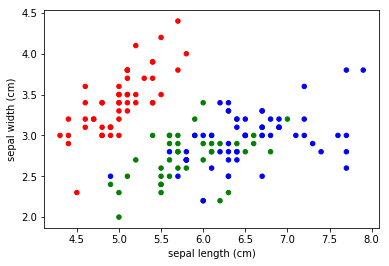

In [6]:
df.plot(kind="scatter",x="sepal length (cm)",y="sepal width (cm)",c=col_n)

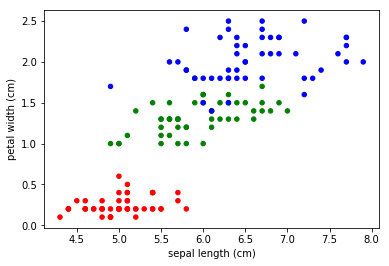

In [7]:
df.plot(kind="scatter",x="sepal length (cm)",y="petal width (cm)",c=col_n)

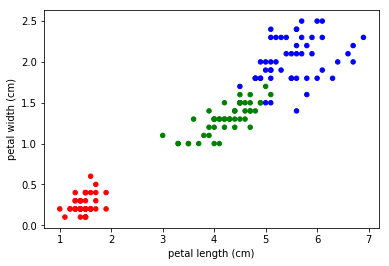

In [8]:
df.plot(kind="scatter",x="petal length (cm)",y="petal width (cm)",c=col_n)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn=KNeighborsClassifier(n_neighbors=6)

In [11]:
knn.fit(iris.data,iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [12]:
prediction=knn.predict(iris.data)
pp(prediction)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [13]:
knn.score(iris.data,iris.target)

0.9733333333333334

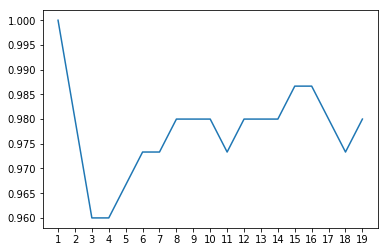

In [14]:
##repeated prediction
p=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(iris.data,iris.target)
    knn.predict(iris.data)
    p.append(knn.score(iris.data,iris.target))
x=np.arange(1,20)
plt.xticks(x)
plt.plot(x,p)
plt.show()

In [15]:
##Uneven distribution
train_data=np.zeros((30,4))
train_data[:10,:]=iris.data[20:30,:].copy()
train_data[10:20,:]=iris.data[60:70,:].copy()
train_data[20:,:]=iris.data[130:140,:].copy()

train_test=np.zeros(30)
train_test[:10]=iris.target[20:30].copy()
train_test[10:20]=iris.target[60:70].copy()
train_test[20:]=iris.target[130:140].copy()

target_data=np.zeros((100,4))
target_data[:,:]=iris.data[20:120,:].copy()

target_test=np.zeros(100)
target_test[:]=iris.target[20:120].copy()

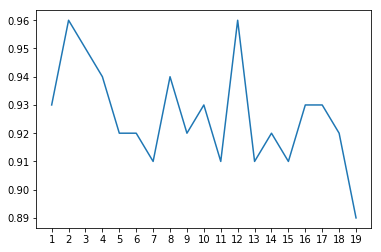

In [16]:
p=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data,train_test)
    knn.predict(target_data)
    p.append(knn.score(target_data,target_test))
x=np.arange(1,20)
plt.xticks(x)
plt.plot(x,p)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(iris.data,iris.target,test_size = 0.7,random_state = 19)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
print(y_test)

(45, 4)
(105, 4)
(45,)
(105,)
[2 0 1 0 2 1 0 2 1 1 1 0 0 1 2 1 2 1 1 0 1 2 2 1 2 1 0 0 1 0 0 2 1 1 0 1 2
 0 1 1 1 0 1 2 1]
[0 2 1 1 0 0 0 0 1 2 1 0 1 0 2 0 2 0 1 0 1 1 1 1 2 1 2 2 1 2 0 2 1 2 1 0 0
 0 2 2 1 2 1 2 2 2 0 2 0 0 0 1 1 0 0 2 0 2 0 0 2 2 2 0 0 2 0 2 1 2 0 1 2 2
 2 0 0 1 1 2 0 0 2 1 1 0 0 1 2 2 2 0 1 2 0 2 1 2 0 2 2 1 1 0 2]


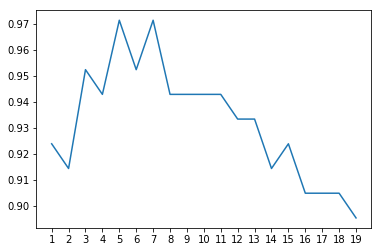

In [26]:
p=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    q=knn.score(x_test,y_test)
    p.append(q)
x=np.arange(1,20)
plt.xticks(x)
plt.plot(x,p)
plt.show()